In [ ]:
import pandas as pd
import numpy as np


df =  pd.DataFrame({
    "weight":[80,70.4,65.5,45.9,51.2],
    "height":[170,180,155,143,154]
})

df

In [ ]:
#평균값 계산
df["height"].mean()

In [ ]:
df["weight"].mean()

In [ ]:
a = [10,20,30,40,50]
b = [10,30,30,30,50]
dfa = pd.DataFrame(a)
dfa = pd.DataFrame(b)


In [ ]:
print(dfa.mean())

In [ ]:
#분산
df["height"].var()

In [ ]:
df["weight"].var()

In [ ]:
df3 = pd.DataFrame(np.random.randn(4,3),columns=["b","d","e"],\
                                          index =["서울","인천","대구","부산"])
df3

In [ ]:
#lambda 입력 : 출력. 자바에서도 있는 람다식.
func = lambda x : x.max() - x.min()
df3.apply(func, axis=0) #axis = 0 열방향(세로), axis = 1 (행방향,가로)

In [ ]:
#csv 모듈을 사용하지 않고 파이썬 문법만 사용한 코드
input_file = 'C:\\Users\\daily\\Desktop\\jupiter_workspace\\0417 (12일차)\\input.csv'
output_file = 'C:\\Users\\daily\\Desktop\\jupiter_workspace\\0417 (12일차)\\output1.csv'

#newline = '' 개행문자를 무시하고 읽음.
#이 옵션이 없으면 빈 라인이 추가됨
with open(input_file,'r',newline='') as reader:
    with open(output_file,'w',newline='') as writer:
        header = reader.readline() #한줄단위로 읽음
#strip() :  문자열 좌우의 공백, 탭, 개행문자 제거
        header = header.strip()
        header_list = header.split(',')
        print(header_list)
#header_list 의 각 값 사이에 쉼표를 삽입하고 리스트를 문자열로 변환
#,개행문자를 끝에 추가
#print(str)
#header_list 의 각 요소를 스트링으로 변환
#print(map(str,header_list))
#header 행의 문자열
#print(','.join(map(str,header_list))+'\n')
        writer.write(','.join(map(str,header_list))+'\n')
        for row in reader:
            row = row.strip()
            row_list = row.split(',')
            print(row_list)
            writer.write(','.join(map(str,row_list))+'\n')

In [ ]:
import pandas as pd
import numpy as np
import csv

input_file = 'C:\\Users\\daily\\Desktop\\jupiter_workspace\\0417 (12일차)\\input.csv'
output_file = 'C:\\Users\\daily\\Desktop\\jupiter_workspace\\0417 (12일차)\\output2.csv'

df = pd.read_csv(input_file)  #파일을 읽어서 데이터프레임으로 리턴
print(df)
#데이터프레임을 csv 파일로 저장, index 생략 여부를 결정
df.to_csv(output_file,index = True) #인덱스를 저장할지 말지 여부를 설정하는 키워드( index = true,false)

In [ ]:
import csv # csv 모듈 로딩
input_file = 'C:\\Users\\daily\\Desktop\\jupiter_workspace\\0417 (12일차)\\data\\input.csv'
output_file = 'C:\\Users\\daily\\Desktop\\jupiter_workspace\\0417 (12일차)\\data\\output3.csv'

#입력파일 오픈
with open(input_file,"r", newline="") as csv_in_file:
    #출력 파일 오픈
    with open(output_file, "w" , newline="") as csv_out_file:
        #csv 파일 로딩(구분자: 쉼표)
        filereader = csv.reader(csv_in_file,delimiter=",")
        filewriter = csv.writer(csv_out_file,delimiter=",")
        #각 라인을 읽어서 파일에 저장
        for row_list in filereader:
            print(row_list)
            filewriter.writerow(row_list)


In [ ]:
import csv # csv 모듈 로딩
input_file = 'C:\\Users\\daily\\Desktop\\jupiter_workspace\\0417 (12일차)\\data\\input.csv'
output_file = 'C:\\Users\\daily\\Desktop\\jupiter_workspace\\0417 (12일차)\\data\\output3.csv'

#입력파일 오픈
with open(input_file,"r", newline="") as csv_in_file:
    #출력 파일 오픈
    with open(output_file, "w" , newline="") as csv_out_file:
        #csv 파일 로딩(구분자: 쉼표)
        filereader = csv.reader(csv_in_file)
        filewriter = csv.writer(csv_out_file)
        #한 라인을 읽음 (첫 라인)
        header = next(filereader)
        #한라인을 저장(첫 라인)
        filewriter.writerow(header)
        for row_list in filereader:
        #행의 첫번째 필드
            supplier = str(row[0]).strip()
        #$ 문자를 제거하고 쉼표를 제거
            cost = str(row[3]).strip('$').replace(',','')
        #supplier 가 A 이거나 cost가 60만 이상인 행만 선택
            if supplier =='A' or float(cost) >=600000.0:
                filewriter.writerow(row)
        #각 라인을 읽어서 파일에 저장
            print(row_list)
            #filewriter.writerow(row_list)
            

In [ ]:
input_file = 'C:\\Users\\daily\\Desktop\\jupiter_workspace\\0417 (12일차)\\data\\input.csv'
output_file = 'C:\\Users\\daily\\Desktop\\jupiter_workspace\\0417 (12일차)\\data\\output3.csv'

df = pd.read_csv(input_file, engine="python") #파일을 읽어서 데이터프레임으로 리턴
#print(df)

#$제거, float로 형변환
df["Cost"] = df["Cost"].str.strip("$").astype(float)
print(df["Cost"])
#loc[행범위,열범위]

#str.contains('')  특정한 문자열이 있는 요소만 검색할때 사용
result = df.loc[(df["Supplier Name"].str.contains("A")) |\
               (df["Cost"] > 600000.0), : ]

print(result)

result.to_csv(output_file,index=True)
#데이터프레임을 csv파일로 저장, index 생략 여부를 결정


In [ ]:
#구매일자가 1월 20일, 1월 30일 인 데이터만 뽑아내기
input_file = 'C:\\Users\\daily\\Desktop\\jupiter_workspace\\0417 (12일차)\\data\\input.csv'
output_file = 'C:\\Users\\daily\\Desktop\\jupiter_workspace\\0417 (12일차)\\data\\OutputDate.csv'

df = pd.read_csv(input_file, engine="python") #파일을 읽어서 데이터프레임으로 리턴

df["Cost"] = df["Cost"].str.strip("$").astype(float)
result = df.loc[(df["Purchase Date"].str.contains("01-20")) |\
               (df["Purchase Date"].str.contains("01-30")), : ]

#isin() 함수를 사용하면 내부에 어떤 데이터가 있는지 찾을 수 있다.
#ex)dates = ["2014-01-20","2018-01-30"]
#print(df["Purchase Date"].isin(dates))

print(result)
result.to_csv(output_file,index=False)

In [ ]:
#구매일자가 1월 20일, 1월 30일 인 데이터만 뽑아내기

input_file = 'C:\\Users\\daily\\Desktop\\jupiter_workspace\\0417 (12일차)\\data\\input.csv'
output_file = 'C:\\Users\\daily\\Desktop\\jupiter_workspace\\0417 (12일차)\\data\\outputDate.csv'
df = pd.read_csv(input_file, engine="python") #파일을 읽어서 데이터프레임으로 리턴

dates = ["2014-01-20","2018-01-30"]

print(df["Purchase Date"].isin(dates))
result = df.loc[ df["Purchase Date"].isin(dates)] 
    


print(result)
result.to_csv(output_file,index=False)

In [ ]:
import csv # csv 모듈 로딩
input_file = 'C:\\Users\\daily\\Desktop\\jupiter_workspace\\0417 (12일차)\\data\\input.csv'
output_file = 'C:\\Users\\daily\\Desktop\\jupiter_workspace\\0417 (12일차)\\data\\outputDateCsv.csv'
#입력파일 오픈
with open(input_file,"r", newline="") as csv_in_file:
    #출력 파일 오픈
    with open(output_file, "w" , newline="") as csv_out_file:
        #csv 파일 로딩(구분자: 쉼표)
        filereader = csv.reader(csv_in_file)
        filewriter = csv.writer(csv_out_file)
        pDate = str(row[4]).str.contains("01-20") | str(row[4]).str.contains("01-30")
        print(pDate)
        #각 라인을 읽어서 파일에 저장
        for row_list in filereader:
            #if supplier =='A' or float(cost) >=600000.0:
            print(row_list)
            #filewriter.writerow(row_list)

In [ ]:
#json 데이터를 판다스의 dataframe으로 변경
import pandas as pd
import json

myobj= """{    "name" : ["김길동", "이선아"],    "age" : [35 ,25],    "gender" : ["남자", "여자"],    "address" : ["서울시", "부천시"]}"""
data = json.loads(myobj) #json데이터를 dict 타입으로 변환. dataframe으로 변환하기 위한 작업..
#dataframe에 값 입력
df = pd.DataFrame(data,columns=['name' ,'age', 'gender', 'address']) 

df


In [ ]:
import pandas as pd
import numpy as np
#2006~2008 데이터 로딩
df1 = pd.read_csv("C:\\Users\\KOSTA\\jupiter_workspace\\0417\\data\\airline\\2006.csv",sep=",")
df2 = pd.read_csv("C:\\Users\\KOSTA\\jupiter_workspace\\0417\\data\\airline\\2007.csv",sep=",")
df3 = pd.read_csv("C:\\Users\\KOSTA\\jupiter_workspace\\0417\\data\\airline\\2008.csv",sep=",")

#데이터프레임 합치기

#df1 = df1.append(df2)
#df1 = df1.append(df3)

In [ ]:
df1.shape

In [ ]:
df1.columns

In [ ]:
df1.head()

In [ ]:
df2 = df1[["Year","Month","ArrDelay","DepDelay"]]

In [ ]:
df2.head() # 처음 5행

In [ ]:
df2.tail() # 마지막 5행

In [ ]:
df2.shape

In [ ]:
df2 = df2.dropna(how="any") #하나의 컬럼이라도 NaN(결측치)이 있으면 제거

In [ ]:
#년도별 그룹바이
result2 = df2.groupby(df2.Year).describe().T

In [ ]:
#데이터프레임을 group by 명령어로 집계 처리  as_index=False 인덱스로 지정할 것인지 여부
result = df2.groupby(["Year","Month"],as_index=False),sum()
result

In [ ]:
result.to_csv("C:\\Users\\KOSTA\\jupiter_workspace\\0417\\data\\airline\\result.csv",sep=",",index=False)

In [ ]:
# sum() 함수 이외에도 pandas에서 DataFrame에 적용되는 함수는 다음의 것들이 있다.

# count 전체 성분의 (NaN이 아닌) 값의 갯수를 계산

# min, max 전체 성분의 최솟, 최댓값을 계산

# argmin, argmax 전체 성분의 최솟값, 최댓값이 위치한 (정수)인덱스를 반환

# idxmin, idxmax 전체 인덱스 중 최솟값, 최댓값을 반환

# quantile 전체 성분의 특정 사분위수에 해당하는 값을 반환 (0~1 사이)

# sum 전체 성분의 합을 계산

# mean 전체 성분의 평균을 계산

# median 전체 성분의 중간값을 반환

# mad 전체 성분의 평균값으로부터의 절대 편차(absolute deviation)의 평균을 계산

# std, var 전체 성분의 표준편차, 분산을 계산

# cumsum 맨 첫 번째 성분부터 각 성분까지의 누적합을 계산 (0에서부터 계속 더해짐)

# cumprod 맨 첫번째 성분부터 각 성분까지의 누적곱을 계산 (1에서부터 계속 곱해짐)



In [ ]:
df1.shape

In [ ]:
# 매직 명렁어 - ipython에서 실행이 됨
# 완성된 그래프를 웹브라우저에서 출력
# 그래프 출력과정을 확인할 수 있다.

# 그래프를 조작이 가능한 모드이다.
# %matplotlib nbagg
#모둘 로딩


%matplotlib inline


In [ ]:

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [ ]:
# 50개의 난수를 생성 rand(갯수)
# 0.0 ~ 1.0 사이의 값이 나온다.

np.random.seed(0)
data = np.random.rand(50)
print(type(data))
print(data)

In [ ]:
# 넘파이 배열을 판다스의 시리즈로 바꿔라.
seri = pd.Series(data)
print(seri.head(6))

#시리즈에서 제공하는 plot()을 제공하고 있다.
seri.plot()

In [ ]:
# 누적 합 cumsum() 첫번째, 두번째 이런 식으로 누적해서 합친 값을 나타낸다

nums = np.random.randn(10)
print(nums)
print(nums.cumsum()) # 누적합
# 아래의 결과를 보면 첫번째는 같지만 그다음 부터는 누적된 값이 된다.

In [ ]:
# 시리즈(1차원 배열) 자료형 생성
# randn(n) : n개의 정규분포를 따르는 난수 생성
# cumsum() : 누적합을 구해주는 함수
# arange(start, end, step) : start ~ end-1, step
# 0~90까지 나온다. step이 10이니까.

import pandas as pd
import numpy as np

s = pd.Series(np.random.randn(10).cumsum(),\
             index = np.arange(0,100,10))

ss = pd.Series(np.random.randn(100).cumsum(),\
             index = np.arange(0,100,1))

ssd = pd.Series(np.random.randn(100),\
             index = np.arange(0,100,1))

# print(s)

# print(ss)

print(ssd)
# ss

In [ ]:
# 그래프에서 스타일 변경
matplotlib.style.use('ggplot')
s.plot()

In [ ]:
# rand(rows, cols)
# 10행 3열의 행렬의 난수 생성
data_set = np.random.rand(10,3)
print(data_set)

#행렬의 차원 확인
print(data_set.shape)

#행렬 데이터
print(type(data_set))

In [ ]:
# 넘파이 행렬을 판다스의 데이터 프레임으로 변환
# 하는 이유는 데이터 프레임이기 때문에 행과 열 형태로
# 데이터를 조회하거나 시각화하기가 좋음

df = pd.DataFrame(data_set, columns = ["A","B","C"])
df
df.plot()

# 그래프를 보면 행이 인덱스니까, 즉 0~9까지가 x축으로 들어 간다.
# 값들이 y축으로 들어 간다.
print("max : ", df.max())
print("min : ", df.min())

In [ ]:
# 막대 그래프 출력해 보자
# 수직 막대 그래프
df.plot(kind="bar")
print(type(df.plot(kind="bar")))
# 수평 막대 그래프
df.plot(kind="barh")

In [ ]:
# 누적 막대 그래프 그려보기
df.plot(kind="area")
# 그래프 보면 A값과 B의값과 C의값이 합쳐진 것을 볼 수가 있다.

In [ ]:
# 연습문제 7번
# 평당 분양가격을  bar 그래프로 그려보기
import pandas as pd





aptData = pd.read_csv('C:\\Users\\daily\\Desktop\\jupiter_workspace\\2019_apt.csv', encoding="cp949")

# aptData = read_csv("2019_apt.csv",encoding="euc-kr")
# aptData["분양가격(㎡)"].
l = [str(x).strip() for x in aptData["분양가격(㎡)"].values] #str float
aptData["분양가격"]=l
a=[]
for x in l:
    x = x.replace(",","")
    if(x==""):
        x=0
    x = float(x)*3.3
    a.append(x)
aptData["평당분양가격"]=a
aptData

# result2 = df.groupby(df.규모구분).describe().T


tmp = np.array(aptData["평당분양가격"].head(50))
idx = aptData["규모구분"].head(50)
print(type(tmp))

df = pd.Series(tmp,idx)
df.plot(kind="bar")




In [ ]:
# 누적 막대 그래프 그려보기
#누적하지 않고 투명하게 보여주는 방법
# stacked = False는 층을 쌓을 것인가에 대한 설정
# A,B,C의 면적을 겹처서 그린 것
df.plot(kind="area", stacked=False)

In [ ]:
# 연습문제 1) 레벨 1.
y = [5, 3, 7, 10, 9, 5, 3.5, 8]
print(type(y))
# 위의 리스트를 np.array로 변환하여 Series의 막대 그래프로 출력하시오.
#인덱스는 리스트로 A
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


y = np.array(y)
yy = pd.Series(y) 
print(yy)
print(type(yy))
yy.index = ["A","B","C","D","E","F","G","H"]
yy.plot(kind="bar")

print(type(yy.plot))


In [ ]:


강사님정답



In [ ]:
plt.xlabel('Sequence')
plt.ylabel('Time(secs)')
plt.title('Group Time Result')
ay = np.array(y)
ay
sri = pd.Series(ay,index=list("ABCDEFGH"))
sri
sri.plot(kind="bar")

In [ ]:


# 연습문제
# 데이터프레임 (2차원 배열 형태) 생성
# randn(rows,cols) 10행 4열의 난수 생성
# arrange(start, end, step)
# randn(행, 열)

nprandom = np.random.randn(10,4)
print(nprandom)

df = pd.DataFrame(np.random.randn(10,4),
                 columns = ["A","B","C","D"],
                 index = np.arange(0,100,10))
df
df.plot()

In [ ]:
# 데이터프레임의 B,C컬럼만 그래프로 출력됨
# df["B"].plot()
# df["C"].plot()

df[["B","C"]].plot()

In [ ]:
#넘파이의 랜덤값 3개 -> 판다스의 시리즈 자료형으로 변환
# 넘파이로 5개 0.0 ~ 1.0 사이의 난수 발생
# index는 행의 이름을 A~E이고 시리즈 이름을 부여했다.

np.random.seed(0)
data = np.random.random(5)
print(data)

plt.title('Pie Exam')
seri2 = pd.Series(\
                 data, index=["A","B","C","D","E"],
                 name = "series pit chart")

# pie 차트에서 autopct를 생략하면 pie안에 글자가 없다
# figsize = (가로, 세로) 그림의 사이즈
seri2.plot(kind="pie",autopct="%.2f", fontsize=20, figsize=(7,5))

In [ ]:
# 시리즈 자료형 변수 생성
# rand(16) 16개의 난수 생성, 0.0 ~ 1.0
# list("문자열") 문자열을 리스트로 변환
s2 = pd.Series(np.random.rand(16), index = list("abcdefghijklmnop"))
s2

In [ ]:
s2.plot()

s2.plot(kind="bar") #세로막대그래프

In [21]:
#한글처리 폰트 설정해보기
from matplotlib import rc, font_manager
#한글 폰트 관련 설정 (matplotlib에서 한글을 사용할 수 있도록 설정)
font_name = font_manager.FontProperties(fname="c:\\Windows\\Fonts\\malgun.ttf").get_name()
rc("font", family=font_name)


In [ ]:
df3 = pd.DataFrame(np.random.randn(6,4),\
                   columns=pd.Index(["사과","배","귤","수박"], name="과일",\
                                          index =["one","two","three","four","five","six"]))
df3

In [ ]:
df3.plot(kind="bar")

In [ ]:
# 가로 방향 막대 그래프, stacked=True 누적시키겠다.
# 막대를 하나로 만들고 값을 비율에 맞게 조절한거고
df3.plot(kind="barh", stacked=True)

In [ ]:
# 히스토그램 : x변수가 가질 수 있는 값의 구간이라서 갯수를 막대 형태로 출력
# 히스토그램은 값만 필요하지 인덱스는 필요하지 않음
# normal() 중앙값, 표준편차 가지고 200개의 난수 발생 (정규분포)
# rand는 무조건 0에서 1사이에 값만 나오는데, 이건 조절할 수 있다.
# 중앙값이 2이고 표준편차 값이 100정도 되는 난수를 200개 출력

np.random.seed(0)
s3 = pd.Series(np.random.normal(2,100,size=200))
#2가 중앙값이고 100이 표준편차. 갯수는 200개
print(s3.shape)
# s3.head() 첫 5행
s3.tail() #마지막 5행



In [ ]:
#마이너스 값이 깨질 수 있는데 이렇게 섦정하면 안깨짐.

plt.rcParams['axes.unicode_minus'] = False

# x축 구간은 기본적으로 10개로 설정이 됨


s3.hist() # 히스토그램 출력

In [ ]:
# x축 구간의 막대의 갯수를 지정
# 히스토그램을 그리면서 bins값을 조정하면
# 막대의 값을 늘일 수 있다.
s3.hist(bins=20)

In [ ]:
# normed(놈드) 를 True로 주면 정규분포가 된다.
# 정규분포는 종모양

s3.hist(bins=10, normed=True)

In [ ]:
#density = True
s3.hist(bins=10, density=True)

In [ ]:
s3.hist(bins=10, density=False)

In [ ]:
# 산점도 : 서로 다른 독립변수 x1, x2의 관계를 파악할 때 사용
# x,y 축을 기준으로 점을 찍은 것이다.
# 점이 모여 있는거 보고 편중됐다 라고 보는 것이다.

# ===============================================

# normal(mu,sigma, size = (row,cols))
# mu : 중앙값(median), sigma : 표준편차

# ==============================================

# 중앙값이 1이고, 표준편차가 1, 사이즈가 100행 1열이다.
# np.random.normal (1,1,size=(100,1))

In [ ]:
x1 = np.random.normal(1,1,size=(100,1))
x2 = np.random.normal(-2,4,size=(100,1))
"""
리스트 [start:end] start~end-1
print(x1[:5])
print(x2[:5])

concatenate 열방향으로 연결
axis = 1 가로방향
axis = 0 세로방향
x1,x2를 합치니까 100 X 2 즉 100행 2열로 합쳐진 리스트가 생성이 됨
"""

X = np.concatenate((x1,x2), axis=1) # 가로 방향으로 합침
#X = np.concatenate((x1,x2), axis=0) # 세로 방향으로 합침

# 첫행부터 5행 출력
print(X[:5])


# 결과에서
# [[x1 x2]] 로 합쳐진 것이다.
# 이걸 가지고 x,y에 맞는 점을 찍겠다는 것

In [ ]:
# 넘파이 배열을 데이터프레임으로 변환
df3 = pd.DataFrame(X, columns =["x1","x2"])
df3.head() #처음 5행

In [ ]:
# 산점도 그리기 - 자료가 흩어져 있는 정도를 파악하기 위한 그래프
# x,y 형태로 산점도를 찍어 봄
plt.scatter(df3["x1"],df3["x2"])

# ====================================

# x1과 x2의 상관관계
# x1(x축), x2(y축)
# 양의 상관관계 : 산점도가 좌측 하단에서 우측상단으로
# 음의 상관관계 : 산점도가 좌측 상단에서 우측 하단으로



In [ ]:

try 없을 때


In [6]:
import csv
from datetime import datetime
from matplotlib import pyplot as plt
filename = "C:\\Users\\daily\\Desktop\\jupiter_workspace\\0417 (12일차)\\temperature_2014.csv"
with open(filename) as f: #데이터파일 로딩
    reader = csv.reader(f) #csv 파일을 읽는 객체
    header_row = next(reader) #첫 행을 읽음
    #날짜, 최고온도, 최저온드를 저장할 리스트
    dates, highs, lows = [], [], []
    for row in reader : # 모든 행 반복처리, 한줄씩 읽음
        #만약 예외를 처리하지 않고 결측치를 만나면 오류가 난다.
        # 그래서 결측치는 처리해주어야 한다.
#         try:
        # strptime() : 문자열 => 날짜
        # strftime() : 날짜 => 문자열
        current_date = datetime.strptime(row[0],"%Y-%m-%d")
        #스트링을 숫자로
        high = int(row[1]) #최고온도
        low = int(row[3]) #최저온도
        # print(current_Date)
#         except ValueError : #예외처리
        #결측치는 빼겠다?
        print(current_date, "missing data")
#         else: #예외가 발생하지 않으면 리스트에 데이터 추가
        dates.append(current_date)
        highs.append(high)
        lows.append(low)
            
            
#데이터 확인
print(dates)


2014-01-01 00:00:00 missing data
2014-01-02 00:00:00 missing data
2014-01-03 00:00:00 missing data
2014-01-04 00:00:00 missing data
2014-01-05 00:00:00 missing data
2014-01-06 00:00:00 missing data
2014-01-07 00:00:00 missing data
2014-01-08 00:00:00 missing data
2014-01-09 00:00:00 missing data
2014-01-10 00:00:00 missing data
2014-01-11 00:00:00 missing data
2014-01-12 00:00:00 missing data
2014-01-13 00:00:00 missing data
2014-01-14 00:00:00 missing data
2014-01-15 00:00:00 missing data
2014-01-16 00:00:00 missing data
2014-01-17 00:00:00 missing data
2014-01-18 00:00:00 missing data
2014-01-19 00:00:00 missing data
2014-01-20 00:00:00 missing data
2014-01-21 00:00:00 missing data
2014-01-22 00:00:00 missing data
2014-01-23 00:00:00 missing data
2014-01-24 00:00:00 missing data
2014-01-25 00:00:00 missing data
2014-01-26 00:00:00 missing data
2014-01-27 00:00:00 missing data
2014-01-28 00:00:00 missing data
2014-01-29 00:00:00 missing data
2014-01-30 00:00:00 missing data
2014-01-31

ValueError: invalid literal for int() with base 10: ''

In [ ]:


try 있을 때



In [78]:
import csv
from datetime import datetime
from matplotlib import pyplot as plt
filename = "C:\\Users\\daily\\Desktop\\jupiter_workspace\\0417 (12일차)\\temperature_2014.csv"
with open(filename) as f: #데이터파일 로딩
    reader = csv.reader(f) #csv 파일을 읽는 객체
    header_row = next(reader) #첫 행을 읽음
    #날짜, 최고온도, 최저온드를 저장할 리스트
    dates, highs, lows = [], [], []
    for row in reader : # 모든 행 반복처리, 한줄씩 읽음
        #만약 예외를 처리하지 않고 결측치를 만나면 오류가 난다.
        # 그래서 결측치는 처리해주어야 한다.
        try:
            # strptime() : 문자열 => 날짜
            # strftime() : 날짜 => 문자열
            current_date = datetime.strptime(row[0],"%Y-%m-%d")
            #스트링을 숫자로
            high = int(row[1]) #최고온도
            low = int(row[3]) #최저온도
            # print(current_Date)
        except ValueError : #예외처리
            #결측치는 빼겠다?
            print(current_date, "missing data")
        else: #예외가 발생하지 않으면 리스트에 데이터 추가
            dates.append(current_date)
            highs.append(high)
            lows.append(low)
            
            
#데이터 확인
print(type(dates))

2014-02-16 00:00:00 missing data
<class 'list'>


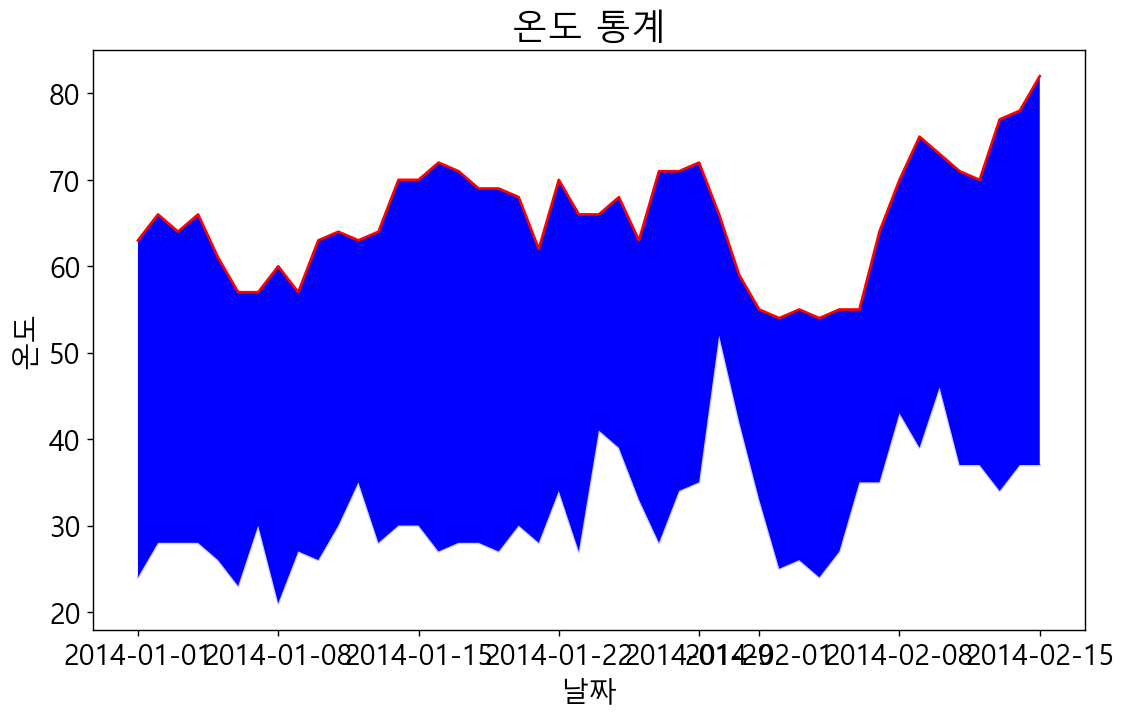

In [22]:
# 그래프 생성, dpi는 해상도 픽셀을 얼마나 더 많이 표현하느냐
# figsize(가로,세로) 가로세로 화면 비율
fig = plt.figure(dpi = 128, figsize=(10,6))
# plot(x축 데이터, y축 데이터, 색상)
# alpha 투명도 0.0 완전투명 ~1.0 완전불투명
plt.plot(dates, highs, c="red", alpha=1.0) #선그래프
plt.plot(dates, lows, c="blue", alpha = 0.2) 
#색상채우기 : fill_between, 중간을 파란색으로 채우겠다. 알파값 조절해봐라.

plt.fill_between(dates,highs, lows, facecolor="blue", alpha=1)
plt.title("온도 통계", fontsize=20) #그래프 제목
plt.xlabel("날짜", fontsize=16) #x축 레이블
plt.ylabel("온도", fontsize=16) #y축 레이블

#tick_params : 눈금 x,y 모두 표시하는 옵션 both

plt.tick_params(axis="both", labelsize=16) # 눈금 표시
plt.show() # 그래프를 화면에 표시

<class 'pandas.core.frame.DataFrame'>
PST                             0
Max TemperatureF                1
Mean TemperatureF               1
Min TemperatureF                1
Max Dew PointF                  1
MeanDew PointF                  1
Min DewpointF                   1
Max Humidity                    1
 Mean Humidity                  1
 Min Humidity                   1
 Max Sea Level PressureIn       1
 Mean Sea Level PressureIn      1
 Min Sea Level PressureIn       1
 Max VisibilityMiles            5
 Mean VisibilityMiles           5
 Min VisibilityMiles            5
 Max Wind SpeedMPH              1
 Mean Wind SpeedMPH             1
 Max Gust SpeedMPH            149
PrecipitationIn                 0
 CloudCover                    17
 Events                       342
 WindDirDegrees                 0
dtype: int64
Max TemperatureF    0
Min TemperatureF    0
PST                 0
dtype: int64


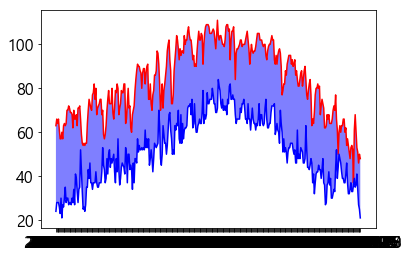

In [194]:
import pandas as pd
import numpy as np

from pandas import Series, DataFrame, MultiIndex,to_numeric,merge, isnull,date_range, read_csv

import csv
from datetime import datetime
from matplotlib import pyplot as plt
# !pip install --upgrade pandas
exam8 = pd.read_csv("C:\\Users\\daily\\Desktop\\jupiter_workspace\\0417 (12일차)\\temperature_2014.csv", engine="python")

print(type(exam8))

# print(exam8)

# x축 = 날짜, y축 = 온도
# current_date = datetime.strptime(row[0],"%Y-%m-%d")
#스트링을 숫자로
# high = int(row[1]) #최고온도
# low = int(row[3]) #최저온도
# print(current_Date)

print(exam8.isnull().sum())



# print(exam8_after)



exam8= exam8[["Max TemperatureF", "Min TemperatureF","PST"]].dropna(axis=0)
print("="*100)
print(exam8.isnull().sum())
# print(exam8_after)

# pd.to_datetime(old_df['oldDate'], format='%b %d, %Y')

cell_text_date = []
for i in exam8["PST"]:
    cell_text_date.append(i)

# print(cell_text_date)

cell_text_max = []
for i in exam8["Max TemperatureF"]:
    cell_text_max.append(i)
    
# print(cell_text_max)

# print(type(int(exam8["Max TemperatureF"][0])))
# cell_text_max.append(exam8["Max TemperatureF"])

cell_text_min = []
for i in exam8["Min TemperatureF"]:
    cell_text_min.append(i)


# fig = plt.figure(dpi = 128, figsize=(10,6))

plt.plot(cell_text_date, exam8["Max TemperatureF"], c="red", alpha=1.0) #선그래프
plt.plot(cell_text_date, exam8["Min TemperatureF"], c="blue", alpha=1.0) 
plt.tick_params(axis="both", labelsize=16) # 눈금 표시
plt.fill_between(cell_text_date,cell_text_max, cell_text_min, facecolor="blue", alpha=0.5)
plt.show()

In [167]:
a = list()
# type(float(exam8["Min TemperatureF"][0]))
# for i in exam8["Min TemperatureF"]:
#     a.append(exam8["Min TemperatureF"][i])
# print(a)

print(exam8["Min TemperatureF"][45])

37.0


In [147]:
import pandas as pd
import numpy as np

from pandas import Series, DataFrame, MultiIndex,to_numeric,merge, isnull,date_range, read_csv

import csv
from datetime import datetime
from matplotlib import pyplot as plt
# !pip install --upgrade pandas
exam8 = pd.read_csv("C:\\Users\\daily\\Desktop\\jupiter_workspace\\0417 (12일차)\\temperature_2014.csv", engine="python")

print(type(exam8))

# print(exam8)

# x축 = 날짜, y축 = 온도
# current_date = datetime.strptime(row[0],"%Y-%m-%d")
#스트링을 숫자로
# high = int(row[1]) #최고온도
# low = int(row[3]) #최저온도
# print(current_Date)

print(exam8.isnull().sum())


exam8["current_date"] = date_range(start='1-1-2019', periods = len(exam8))
# print(exam8_after)
# pd.to_datetime(exam8['current_date'], format='%b %d, %Y')

exam8= exam8[["Max TemperatureF", "Min TemperatureF","current_date"]].dropna(axis=0)
print(exam8_after.isnull().sum())
# print(exam8_after)

# pd.to_datetime(old_df['oldDate'], format='%b %d, %Y')

# cell_text_date = []
# cell_text_date.append(exam8["current_date"])

print(cell_text_date)

cell_text_max = []

for i in exam8["Max TemperatureF"]:
    cell_text_max.append(float(exam8["Max TemperatureF"][i]))

print(cell_text_max)

print(type(int(exam8["Max TemperatureF"][0])))
cell_text_max.append(exam8["Max TemperatureF"])

cell_text_min = []
cell_text_min.append(exam8["Min TemperatureF"])


fig = plt.figure(dpi = 128, figsize=(10,6))

plt.plot(cell_text_date, cell_text_max, c="red", alpha=1.0) #선그래프
plt.plot(cell_text_date, cell_text_min, c="blue", alpha=1.0) 
# plt.tick_params(axis="both", labelsize=16) # 눈금 표시
# plt.fill_between(cell_text_date,cell_text_max, cell_text_min, facecolor="blue", alpha=1)

63.0
<class 'numpy.float64'>
<class 'int'>
63
